In [1]:
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import glob

import parselmouth

from parselmouth.praat import call
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(r"C:\Users\ASUS\Downloads\Detection of parkinsons disease using voice\New_train_data.csv")

data.head()

,Subject_ID,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,...,Maximum Pitch,Number of Pulses,Number of Periods,Mean Period,Standard Deviation of Period,Fraction of Locally Unvoiced Frames,Number of Voice Breaks,Degree of Voice Breaks,UPDRS,Class_Information
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.200,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [3]:
data.shape

(1040, 29)

In [4]:
data1=data.drop(['UPDRS', 'Subject_ID','Number of Pulses','Number of Periods','Fraction of Locally Unvoiced Frames','Median Pitch','Number of Voice Breaks','Degree of Voice Breaks','AC','Minimun Pitch','Maximum Pitch','Mean Period','Standard Deviation of Period','NTH'],axis=1)

In [5]:
data1.isnull().sum()

localJitter            0
localabsoluteJitter    0
rapJitter              0
ppq5Jitter             0
ddpJitter              0
localShimmer           0
localdbShimmer         0
apq3Shimmer            0
aqpq5Shimmer           0
apq11Shimmer           0
ddaShimmer             0
hnr                    0
meanF0                 0
stdevF0                0
Class_Information      0
dtype: int64

In [6]:
data1.dtypes

localJitter            float64
localabsoluteJitter    float64
rapJitter              float64
ppq5Jitter             float64
ddpJitter              float64
localShimmer           float64
localdbShimmer         float64
apq3Shimmer            float64
aqpq5Shimmer           float64
apq11Shimmer           float64
ddaShimmer             float64
hnr                    float64
meanF0                 float64
stdevF0                float64
Class_Information        int64
dtype: object

In [7]:
df1=data1.pop('Class_Information')

data1['Class_Information'] = df1

In [8]:
#sns.distplot( data[data.Class_Information == 0]['spread1'], color = 'r')
#sns.distplot( data[data.status == 1]['spread1'], color = 'g')

In [9]:
#fig, ax = plt.subplots(1,2,figsize=(16,8))
#sns.boxplot(x='status',y='NHR',data=data,ax=ax[0])
#sns.boxplot(x='status',y='HNR',data=data,ax=ax[1])

In [10]:
#fig, ax = plt.subplots(1,2,figsize=(16,8))
#sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=data,palette="Set1",ax=ax[0])
#sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=data,palette="Set1",ax=ax[1])

In [11]:
#cols = ["MDVP:Jitter(%)","MDVP:Jitter(%)","MDVP:RAP","MDVP:PPQ","Jitter:DDP"]
#fig, axs = plt.subplots(ncols = 5,figsize=(16,8))
#fig.tight_layout()
#for i in range(0,len(cols)):
    #sns.boxplot(x='status',y=cols[i],data=data, ax = axs[i])

In [12]:
#corr = data.corr()
#sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
##plt.figure(figsize=(18,7))

#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask, 1)] = True
#a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
#rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
#roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

In [13]:
features=data1.loc[:,data1.columns!='Class_Information'].values[:,0:]
labels=data1.loc[:,'Class_Information'].values

In [14]:
data1.head()

,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,hnr,meanF0,stdevF0,Class_Information
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,13.551,11.130,164.781,10.421,1
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,6.175,17.403,193.289,14.773,1
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,13.040,12.212,164.768,12.981,1
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,15.789,11.384,203.471,10.853,1
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,9.307,10.653,208.440,11.499,1


In [15]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

# Training Model

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=100)

In [20]:
model = XGBClassifier(max_depth=6, min_child_weight=2, reg_lambda = 100, reg_alpha =4)

In [21]:
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_metric=["error", "logloss"], early_stopping_rounds=50, eval_set=eval_set, verbose=False)

c:\new folder\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\new folder\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=4, reg_lambda=100, ...)

In [22]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [23]:
print(accuracy_score(y_test,y_pred)*100)

71.63461538461539


In [24]:
print(y_pred)

[0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1
 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0
 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1
 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0]


In [25]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

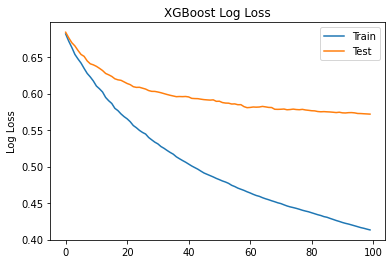

In [26]:
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

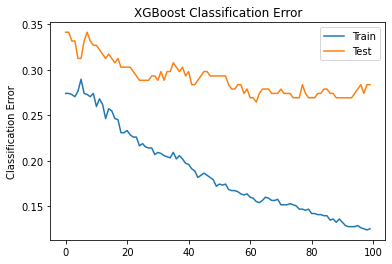

In [27]:
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

[[72 29]
 [30 77]]


c:\new folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


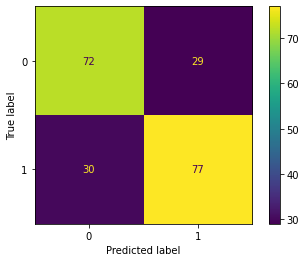

In [28]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, plot_roc_curve, roc_curve
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test)
plt.show()

In [29]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       101
           1       0.73      0.72      0.72       107

    accuracy                           0.72       208
   macro avg       0.72      0.72      0.72       208
weighted avg       0.72      0.72      0.72       208



c:\new folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


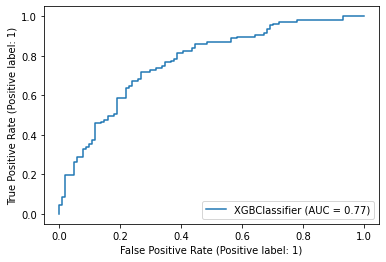

In [30]:
plot_roc_curve(model, x_test, y_test)

In [31]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

0.7951360158973454


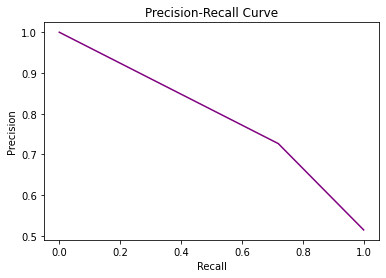

In [32]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [33]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [34]:
logloss = log_loss(y_test, y_pred)
logloss

9.797168248198105

In [35]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA

pca = PCA(n_components = 9)

x_train = pca.fit_transform(x_train)

x_test = pca.transform(x_test)

variance = pca.explained_variance_ratio_

classifi = KNeighborsClassifier(n_neighbors = 11,p=2,metric ='minkowski')

classifi.fit(x_train,y_train)

y_pred = classifi.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score

 #KNN model

cm=confusion_matrix(y_test,y_pred)

accuracy_score(y_test,y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62       101
           1       0.63      0.60      0.62       107

    accuracy                           0.62       208
   macro avg       0.62      0.62      0.62       208
weighted avg       0.62      0.62      0.62       208



In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, plot_roc_curve

In [37]:
y_test

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

[[64 37]
 [43 64]]


c:\new folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


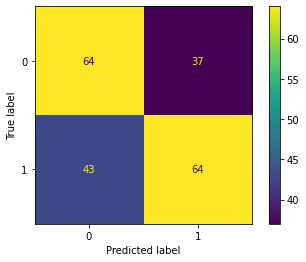

In [38]:

print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(classifi, x_test, y_test)
plt.show()

In [39]:
y_test

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [40]:
# Displaying the classification report using sklearn

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62       101
           1       0.63      0.60      0.62       107

    accuracy                           0.62       208
   macro avg       0.62      0.62      0.62       208
weighted avg       0.62      0.62      0.62       208



In [41]:
#for wave_file in glob.glob(r"C:\Users\ASUS\Downloads\26_29_09_2017_KCL\26-29_09_2017_KCL\ReadText\PD\*.wav"):
sound = parselmouth.Sound(r"C:\Users\ASUS\Downloads\Audio_Data_For_Validation-20230302T160451Z-001\Audio_Data_For_Validation\ReadText\PD\ID18_pd_4_3_3.wav")

In [42]:
def measurePitch(voiceID, f0min, f0max, unit):
    sound = parselmouth.Sound(voiceID) # read the sound
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) #create a praat pitch object
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    pointProcess = call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
    
    localJitter = (call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3))*100
    localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
    rapJitter = (call(pointProcess, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3))*100
    ppq5Jitter = (call(pointProcess, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3))*100
    ddpJitter = (call(pointProcess, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3))*100
    localShimmer =  (call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6))*100
    localdbShimmer = call([sound, pointProcess], "Get shimmer (local_dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq3Shimmer = (call([sound, pointProcess], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6))*100
    aqpq5Shimmer = (call([sound, pointProcess], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6))*100
    apq11Shimmer =  (call([sound, pointProcess], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6))*100
    ddaShimmer = (call([sound, pointProcess], "Get shimmer (dda)", 0, 0, 0.0001, 0.02, 1.3, 1.6))*100
    hnr = call(harmonicity, "Get mean", 0, 0)
    meanF0 = call(pitch, "Get mean", 0, 0, unit) # get mean pitch
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) # get standard deviation

    return localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer, hnr,meanF0, stdevF0 

In [43]:

(localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer, hnr,meanF0, stdevF0 ) = measurePitch(sound, 75, 500, "Hertz")

In [44]:
print(localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer, hnr, meanF0, stdevF0)

3.0815888599808305 0.00022095675442377114 1.524537847243539 1.5256097629338132 4.573613541730618 11.060115147787505 1.0846940110961125 5.293528908153386 6.430329243631773 10.660451003058489 15.880586724460159 16.03189475079335 140.04466685862096 47.13026000854531


In [45]:
newinput=[[localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer, hnr, meanF0, stdevF0]]

In [46]:
scaler1 = MinMaxScaler((-1,1))
nn = scaler1.fit_transform(newinput)
output = model.predict(nn)
output

array([0])